# Name-Sharanya Manohar
# Sparks Foundation Task1:Linear Regression
# Domain-Data Science and business analytics internship 

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading the dataset

In [3]:
df=pd.read_csv("http://bit.ly/w-data")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


AS we read the dataset in which it contains 2 columns Hours and scores

# Shape of dataset

In [5]:
df.shape

(25, 2)

It contains 25 rows and 2 columns

In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

As there is no null values present.

In [9]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## As the problem statement is-Predict the percentage of students based on number of study hours

In [11]:
#So lets check the relationship between Hours and scores

In [12]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


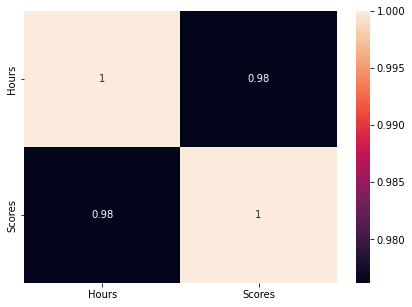

In [13]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True)#annot=True because all the scores of the correlation will be also mentioned
plt.show()


As we can see that hours and score is highly correlated .
We can apply linear regression algorithm if there is no relation between feature and feature but correlated is allowed in between feature and label.
So,Hours and scores is highly correlated in which Hours(Feature) and scores(Label).So we can create with simple linear regression model.

array([[<AxesSubplot:title={'center':'Hours'}>,
        <AxesSubplot:title={'center':'Scores'}>]], dtype=object)

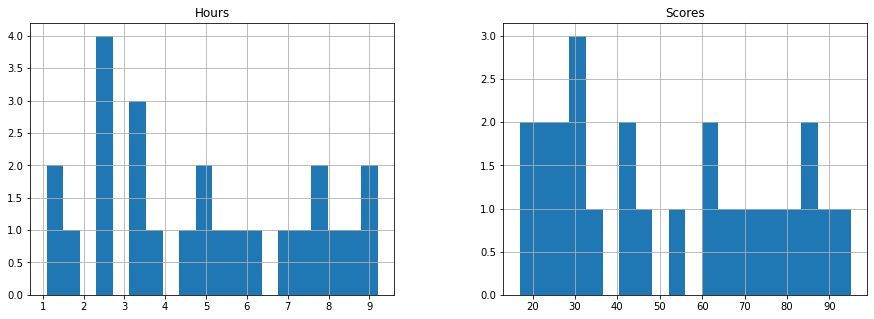

In [14]:
df.hist(bins = 20,figsize = (15,5))

As we can visulaize that minimum hours that students took for studies is 1 Hours and maximum is 9 Hours.We can visualize that most of the students investing time in between 2 to 3 hours for studies.
And in score visulaization minimum number of scores is 20 and maximum is 90 ,most of the student score in between 25 to 30 scores

Text(0.5, 1.0, 'Hours vs Scores')

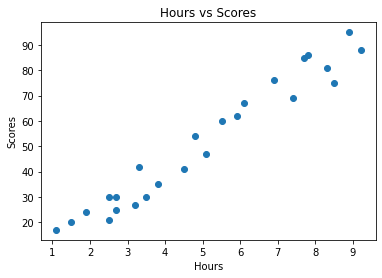

In [15]:
#Scatter plot visualization
plt.scatter(df["Hours"],df["Scores"])
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores")

As by visualization we can visualize that if the hours increase then scores is also increase-Positively correlated

In [17]:
#Lets create x and y data
x=df['Hours']
y=df.drop("Hours",axis=1)

In [18]:
x.head()

0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours, dtype: float64

In [19]:
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


## Train and test split

In [ ]:
#lets do the train and test split in 80:20 ratio

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [21]:
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

As due to series object and shape error we cant able to create the model.So done with the reshaping

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

In [23]:
lr = LinearRegression()  
lr.fit(X_train, y_train) 

LinearRegression()

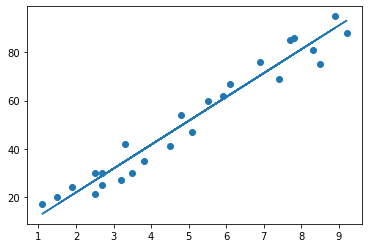

In [24]:
# Plotting the regression line
line = lr.coef_*x+lr.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [28]:
predict_value=lr.predict(X_test)
predict_value

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [29]:
df_value = pd.DataFrame({'Actual': y_test, 'Predicted': predict_value})  
df_value

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [31]:
lr.score(X_train, y_train)#as its showing 95% accuracy

0.9515510725211552

In [37]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, predict_value))

Mean Absolute Error: 4.183859899002975


In [40]:
#Lets predict the score as per the hours the user spent on his/her skills
result=float(input("How many hours you're spending to improve your skills:"))
lr.predict([[result]])

How many hours you're spending to improve your skills:8.0


array([81.30341189])